# Data Science Tools Project on Lung Cancer dataset

### First we load the data from the github repository (VCS)

In [1]:
# ! git clone https://github.com/MarwanAshraf03/Data_Science_Tools.git
# %cd Data_Science_Tools/Text\ Data\ Project/

### Import needed libraries

In [2]:
from scipy.io import arff

import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA

from sklearn.svm import SVC

from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans

from sklearn.metrics import classification_report,accuracy_score

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import AgglomerativeClustering

import seaborn as sns

import plotly.express as px

from scipy.cluster.hierarchy import dendrogram, linkage

### Read and preprocess the data

In [3]:
data, meta = arff.loadarff("Lung.arff")

df = pd.DataFrame(data)

print(df)


     AFFX-MurIL2_at  AFFX-MurIL10_at  AFFX-MurIL4_at  AFFX-MurFAS_at  \
0           -18.600            10.54           0.010          19.440   
1             9.120             9.12          10.180          29.290   
2            -2.175            -2.21          -0.060           6.320   
3            -1.540            21.75           5.835          23.815   
4            -9.070             3.08          -1.980          17.260   
..              ...              ...             ...             ...   
198          35.140           106.16          52.280          65.340   
199         -21.150           -31.20         -11.820           8.280   
200          26.900            10.44          18.230          33.830   
201          23.800            29.14          31.800          65.610   
202         -18.370            -1.03          -8.260          27.150   

     AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  AFFX-BioC-5_at  \
0           -16.980          -27.50          -1.600           38

### Check for duplicate and null data

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum().sum()

0

### Count all the occurrences of each Lung Cancer category in the dataset

In [6]:
dicti = {}
for i in df[:]['type']:
    if i not in dicti.keys():
        dicti[i] = 1
    else:
        dicti[i] += 1
print(dicti)

{b'1': 139, b'2': 17, b'3': 6, b'4': 21, b'5': 20}


### Data to be used to make the model

In [7]:
X = df.copy().drop('type', axis=1)
y = df.copy()['type']

In [8]:

label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)
y_binary


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4])

### Scaling the data

In [9]:
scale=StandardScaler()
X_scaled=scale.fit_transform(X)


In [10]:
X_scaled.shape

(203, 12600)

### Split the data to training and testing datasets

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_binary,test_size=0.40,random_state=42,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((121, 12600), (121,), (82, 12600), (82,))

In [12]:
X_test=pd.DataFrame(X_test)
X_train=pd.DataFrame(X_train)

## First filter method technique

### We use the Random Forest Classifier to know which is the best number of features to be used to obtain the maximum support

In [13]:

scores=[]

RandomForest=RandomForestClassifier()

no_of_features=[x*100 for x in range(1,120)]


for i in no_of_features:

    selector = SelectKBest(f_classif, k=i)

    X_selected = selector.fit_transform(X_scaled, y)

    selected_indices = selector.get_support(indices=True)

    RandomForest.fit(X_train[selected_indices],y_train)

    scores.append(RandomForest.score(X_test[list(selected_indices)],y_test))


In [14]:
socre_per_features=[i for i in zip(no_of_features,scores)]
socre_per_features=np.array(socre_per_features)
socre_per_features

array([[1.00000000e+02, 8.90243902e-01],
       [2.00000000e+02, 9.14634146e-01],
       [3.00000000e+02, 9.14634146e-01],
       [4.00000000e+02, 9.26829268e-01],
       [5.00000000e+02, 9.14634146e-01],
       [6.00000000e+02, 9.39024390e-01],
       [7.00000000e+02, 9.26829268e-01],
       [8.00000000e+02, 9.26829268e-01],
       [9.00000000e+02, 9.14634146e-01],
       [1.00000000e+03, 9.14634146e-01],
       [1.10000000e+03, 9.26829268e-01],
       [1.20000000e+03, 9.14634146e-01],
       [1.30000000e+03, 9.02439024e-01],
       [1.40000000e+03, 9.02439024e-01],
       [1.50000000e+03, 9.02439024e-01],
       [1.60000000e+03, 9.14634146e-01],
       [1.70000000e+03, 9.14634146e-01],
       [1.80000000e+03, 9.02439024e-01],
       [1.90000000e+03, 9.02439024e-01],
       [2.00000000e+03, 8.90243902e-01],
       [2.10000000e+03, 9.02439024e-01],
       [2.20000000e+03, 8.90243902e-01],
       [2.30000000e+03, 8.90243902e-01],
       [2.40000000e+03, 9.02439024e-01],
       [2.500000

In [15]:

best_no_of_features_values = max(socre_per_features, key=lambda x: x[1])

best_no_of_features=int(best_no_of_features_values[0])
highest_accuracy=best_no_of_features_values[1]
print(f"{best_no_of_features} is the best number of feature based on f_classif feature selection technique technique with {highest_accuracy: .4} accuracy using RandomForest model")


600 is the best number of feature based on f_classif feature selection technique technique with  0.939 accuracy using RandomForest model


### These are the columns to be used which give best support

In [16]:
selector = SelectKBest(f_classif, k=best_no_of_features)
X_selected = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)

#selected genes
selected_features = X.columns[selected_indices]

print("Selected Features:", selected_features)


Selected Features: Index(['31403_at', '31444_s_at', '31525_s_at', '31638_at', '31918_at',
       '32425_at', '32444_at', '33051_at', '33074_g_at', '33693_at',
       ...
       '274_at', '268_at', '260_at', '227_g_at', '236_at', '202_at', '185_at',
       '197_at', '198_g_at', '162_at'],
      dtype='object', length=600)


### First Classification technique: Random Forest Classifier

In [17]:
RandomForest.fit(X_train[selected_indices],y_train)

RandomForestClassifier()

In [18]:
pred=RandomForest.predict(X_test[selected_indices])
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 4, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 1, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 4, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0])

In [19]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        60
           1       0.86      0.86      0.86         7
           2       1.00      1.00      1.00         2
           3       0.56      1.00      0.71         5
           4       1.00      1.00      1.00         8

    accuracy                           0.93        82
   macro avg       0.88      0.95      0.90        82
weighted avg       0.95      0.93      0.93        82



In [20]:
# sns.heatmap(confusion_matrix(pred,y_test),annot=True)

NameError: name 'sns' is not defined

### Second classification model: Logistic Regression

In [21]:
logregression = LogisticRegression()

logregression.fit(X_train[selected_indices], y_train)



c:\Users\jacko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = logregression.predict(X_test[selected_indices])
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [23]:

print(f"Accuracy: {accuracy:.3f}")
print(f"Classification Summary:\n {report}")

Accuracy: 0.951
Classification Summary:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.86      0.86      0.86         7
           2       1.00      1.00      1.00         2
           3       0.89      0.89      0.89         9
           4       1.00      1.00      1.00         8

    accuracy                           0.95        82
   macro avg       0.94      0.94      0.94        82
weighted avg       0.95      0.95      0.95        82



In [24]:
y_pred_decoded = label_encoder.inverse_transform(y_pred)
print(f"Predicted Cancer Types:{y_pred_decoded}")

Predicted Cancer Types:[b'2' b'1' b'1' b'1' b'1' b'4' b'1' b'2' b'5' b'4' b'4' b'4' b'1' b'1'
 b'4' b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'5' b'2' b'1' b'1'
 b'1' b'5' b'1' b'1' b'5' b'1' b'5' b'1' b'1' b'1' b'1' b'1' b'1' b'1'
 b'1' b'4' b'1' b'5' b'1' b'2' b'2' b'1' b'1' b'1' b'1' b'3' b'1' b'1'
 b'2' b'1' b'4' b'4' b'1' b'1' b'1' b'4' b'1' b'1' b'1' b'1' b'2' b'1'
 b'3' b'1' b'5' b'1' b'5' b'1' b'1' b'1' b'1' b'1' b'1' b'1']


### Third Classification model: Support Vector Classification

In [25]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)


In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test,y_pred))

Accuracy: 0.878
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        56
           1       0.83      0.71      0.77         7
           2       0.00      0.00      0.00         2
           3       1.00      0.44      0.62         9
           4       1.00      1.00      1.00         8

    accuracy                           0.88        82
   macro avg       0.74      0.63      0.66        82
weighted avg       0.87      0.88      0.86        82



c:\Users\jacko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jacko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jacko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [27]:


numerical_columns = df.select_dtypes(include='number')

n_components = 2
pca = PCA(n_components=n_components)

principal_components = pca.fit_transform(numerical_columns)

principal_df = pd.DataFrame(data=principal_components, columns=['PC{}'.format(i+1) for i in range(n_components)])

print(principal_df)




              PC1          PC2
0     4294.574339 -2602.990649
1    -7321.610287 -5683.608846
2    -4849.176655 -2224.592370
3    -6903.139071 -6631.330322
4    -7544.389199  -916.037116
..            ...          ...
198  19985.371624 -2843.106475
199  14886.420315  -200.846569
200  18104.805560 -1491.062045
201   5273.521690 -2116.566977
202  20824.485993 -2167.989679

[203 rows x 2 columns]


c:\Users\jacko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


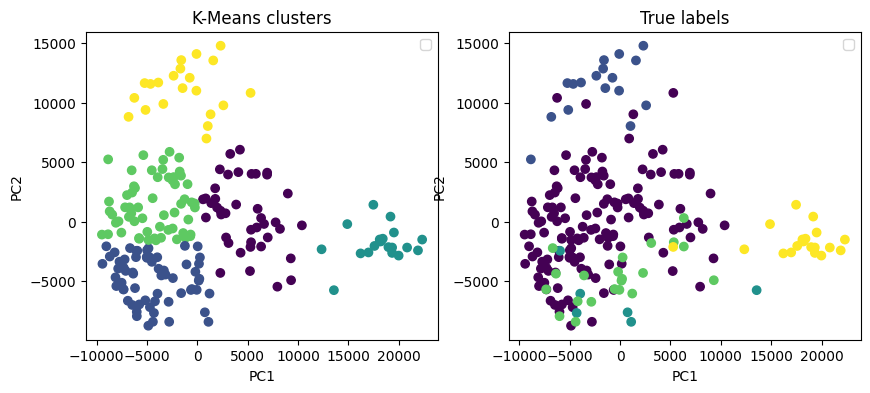

In [28]:
principal_df["type"]=df["type"]

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(principal_df.drop("type",axis=1))


cluster_labels = kmeans.labels_

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=cluster_labels, cmap='viridis')
plt.title('K-Means clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()


plt.subplot(1,2,2)
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df["type"], cmap='viridis')
plt.title('True labels')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
plt.show()


In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(principal_df,y_binary,test_size=0.40,random_state=42)

In [30]:
RandomForest.fit(xtrain, ytrain)

RandomForestClassifier()

In [31]:
ypred = RandomForest.predict(xtest)
accuracy = accuracy_score(ypred, ytest)
accuracy

1.0

# Now for the other filter method technique

### It relies heavily on Random Forest Classification, it takes training data and uses it to train a random forest classifier then it extracts the importance of each feature then we use this features importances to evaluate the best accuracy or support

In [32]:
xtrain, xtest, ytrain, ytest=train_test_split(X_scaled,y_binary, stratify=y, test_size=0.40,random_state=42)
RandomForest.fit(xtrain, ytrain)

RandomForestClassifier()

In [33]:
feature_importances = pd.Series(RandomForest.feature_importances_, index=df.copy().columns[:-1])

In [34]:
acclist = []
for i in range(1, len(df.columns)-1, 100):
  selected_features = feature_importances.nlargest(i).index
  df_selected = df[selected_features]
  x = df_selected.copy()
  xscaled = scale.fit_transform(x)
  xtrain, xtest, ytrain, ytest=train_test_split(xscaled, y_binary, test_size=0.40, random_state=42)
  RandomForest.fit(xtrain, ytrain)
  ypred = RandomForest.predict(xtest)
  acc = accuracy_score(ytest, ypred)
  acclist.append(acc)
print(acclist)

[0.573170731707317, 0.926829268292683, 0.9390243902439024, 0.9024390243902439, 0.9390243902439024, 0.9390243902439024, 0.926829268292683, 0.926829268292683, 0.9390243902439024, 0.926829268292683, 0.926829268292683, 0.926829268292683, 0.9146341463414634, 0.9146341463414634, 0.926829268292683, 0.9146341463414634, 0.8780487804878049, 0.8902439024390244, 0.9024390243902439, 0.9146341463414634, 0.8780487804878049, 0.9146341463414634, 0.9024390243902439, 0.8780487804878049, 0.8780487804878049, 0.8902439024390244, 0.8658536585365854, 0.8780487804878049, 0.8658536585365854, 0.8658536585365854, 0.9146341463414634, 0.9024390243902439, 0.9146341463414634, 0.8902439024390244, 0.8658536585365854, 0.9024390243902439, 0.8414634146341463, 0.8414634146341463, 0.8780487804878049, 0.8658536585365854, 0.8536585365853658, 0.8658536585365854, 0.8902439024390244, 0.8780487804878049, 0.8780487804878049, 0.8780487804878049, 0.8780487804878049, 0.8780487804878049, 0.8536585365853658, 0.9024390243902439, 0.89024

In [35]:
dictt = {}
for i in range(0, len(acclist)):
  # print(f"{i*100+1} => {acclist[i]}")
  dictt[f"{i*100+1}"] = acclist[i]

In [36]:
sorted_dict_values = dict(sorted(dictt.items(), key=lambda item: item[1]))
print(sorted_dict_values)

{'1': 0.573170731707317, '3601': 0.8414634146341463, '3701': 0.8414634146341463, '9201': 0.8414634146341463, '9901': 0.8414634146341463, '4001': 0.8536585365853658, '4801': 0.8536585365853658, '6001': 0.8536585365853658, '7601': 0.8536585365853658, '8001': 0.8536585365853658, '9001': 0.8536585365853658, '9101': 0.8536585365853658, '9401': 0.8536585365853658, '9501': 0.8536585365853658, '9801': 0.8536585365853658, '10001': 0.8536585365853658, '10101': 0.8536585365853658, '10201': 0.8536585365853658, '10501': 0.8536585365853658, '10701': 0.8536585365853658, '10801': 0.8536585365853658, '11301': 0.8536585365853658, '12001': 0.8536585365853658, '12101': 0.8536585365853658, '12401': 0.8536585365853658, '2601': 0.8658536585365854, '2801': 0.8658536585365854, '2901': 0.8658536585365854, '3401': 0.8658536585365854, '3901': 0.8658536585365854, '4101': 0.8658536585365854, '5201': 0.8658536585365854, '5701': 0.8658536585365854, '6301': 0.8658536585365854, '6501': 0.8658536585365854, '6601': 0.865

In [37]:
selected_features = feature_importances.nlargest((acclist.index(max(acclist)))*100).index
df_selected = df.copy()[selected_features]

In [38]:
print(df)

     AFFX-MurIL2_at  AFFX-MurIL10_at  AFFX-MurIL4_at  AFFX-MurFAS_at  \
0           -18.600            10.54           0.010          19.440   
1             9.120             9.12          10.180          29.290   
2            -2.175            -2.21          -0.060           6.320   
3            -1.540            21.75           5.835          23.815   
4            -9.070             3.08          -1.980          17.260   
..              ...              ...             ...             ...   
198          35.140           106.16          52.280          65.340   
199         -21.150           -31.20         -11.820           8.280   
200          26.900            10.44          18.230          33.830   
201          23.800            29.14          31.800          65.610   
202         -18.370            -1.03          -8.260          27.150   

     AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  AFFX-BioC-5_at  \
0           -16.980          -27.50          -1.600           38

In [39]:
print(df_selected)

     2092_s_at  41338_at  34823_at  35354_at  1802_s_at  1814_at  34773_at  \
0      1131.20    611.06    24.300    36.450    103.760  120.810    115.13   
1       554.77    323.01    88.750    47.340     36.730   93.000     94.06   
2       817.95    333.17     8.915    12.325     65.630  137.920    150.79   
3       547.39    388.60    39.115    35.180     85.325   70.745    159.26   
4       297.03    311.13    88.110    17.260    105.300  150.780    126.53   
..         ...       ...       ...       ...        ...      ...       ...   
198     100.44   1091.40    41.670   243.370     18.000   41.670    379.75   
199     126.88    913.03   106.010   138.400    -32.640  122.560    359.47   
200      67.63   1607.10    15.630   202.140    -22.470  239.490    186.51   
201     246.60   1582.50    30.910   180.550     -7.320   75.400    285.91   
202      15.59   1568.50    19.200   116.890    -40.760   -1.030    624.92   

     1420_s_at  34265_at  38044_at  ...  34354_at  36643_at  39

In [40]:
print(len(selected_features))

200


In [41]:
print(selected_features)

Index(['2092_s_at', '41338_at', '34823_at', '35354_at', '1802_s_at', '1814_at',
       '34773_at', '1420_s_at', '34265_at', '38044_at',
       ...
       '34354_at', '36643_at', '39775_at', '35726_at', '31854_at', '36042_at',
       '39075_at', '33730_at', '35723_at', '33158_at'],
      dtype='object', length=200)


In [42]:
x = df_selected.copy()
xscaled = scale.fit_transform(x)
xtrain, xtest, ytrain, ytest=train_test_split(xscaled, y_binary, test_size=0.40, random_state=42, stratify=y)
# xtrain, xtest, ytrain, ytest=train_test_split(xscaled, y, test_size=0.40, random_state=42)

In [43]:
RandomForest.fit(xtrain,ytrain)
pred=RandomForest.predict(xtest)
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 1, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 4, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0])

In [44]:
print(accuracy_score(pred, ytest))
# print(classification_report(pred,ytest))

0.9024390243902439


In [45]:
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        62
           1       0.86      0.86      0.86         7
           2       0.50      1.00      0.67         1
           3       0.44      1.00      0.62         4
           4       1.00      1.00      1.00         8

    accuracy                           0.90        82
   macro avg       0.76      0.95      0.81        82
weighted avg       0.94      0.90      0.91        82



### The second technique: Logistic Regression

In [46]:
logregression = LogisticRegression()
logregression.fit(xtrain, ytrain)

LogisticRegression()

In [47]:
y_pred = logregression.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

In [48]:
print(f"Accuracy: {accuracy:.3f}")
print(f"Classification Summary:\n {report}")

Accuracy: 0.915
Classification Summary:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.86      0.86      0.86         7
           2       1.00      1.00      1.00         2
           3       0.83      0.56      0.67         9
           4       1.00      1.00      1.00         8

    accuracy                           0.91        82
   macro avg       0.92      0.88      0.89        82
weighted avg       0.91      0.91      0.91        82



In [49]:
y_pred_decoded = label_encoder.inverse_transform(y_pred)
print(f"Predicted Cancer Types:{y_pred_decoded}")

Predicted Cancer Types:[b'2' b'1' b'1' b'1' b'1' b'4' b'1' b'2' b'5' b'1' b'1' b'1' b'1' b'1'
 b'4' b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'5' b'2' b'1' b'1'
 b'1' b'5' b'1' b'1' b'5' b'1' b'5' b'1' b'1' b'1' b'1' b'1' b'1' b'1'
 b'1' b'4' b'1' b'5' b'1' b'2' b'2' b'1' b'1' b'1' b'1' b'3' b'1' b'1'
 b'2' b'1' b'4' b'4' b'1' b'1' b'1' b'4' b'1' b'1' b'1' b'1' b'2' b'1'
 b'3' b'1' b'5' b'1' b'5' b'1' b'1' b'1' b'1' b'1' b'1' b'1']


### Third Classification model: Support Vector Classification

In [50]:
svc = SVC()
svc.fit(xtrain, ytrain)
y_pred = svc.predict(xtest)

In [51]:
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(ytest, y_pred))

Accuracy: 0.902
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.86      0.86      0.86         7
           2       1.00      0.50      0.67         2
           3       0.83      0.56      0.67         9
           4       0.89      1.00      0.94         8

    accuracy                           0.90        82
   macro avg       0.90      0.78      0.81        82
weighted avg       0.90      0.90      0.90        82



              PC1          PC2
0     4294.574337 -2602.990755
1    -7321.610286 -5683.607907
2    -4849.176655 -2224.593487
3    -6903.139069 -6631.329097
4    -7544.389199  -916.036715
..            ...          ...
198  19985.371626 -2843.106223
199  14886.420315  -200.846195
200  18104.805560 -1491.061338
201   5273.521690 -2116.567930
202  20824.485993 -2167.989664

[203 rows x 2 columns]
[1 0 0 0 0 0 0 0 0 0 2 1 0 2 2 0 0 2 2 2 2 2 0 2 0 2 2 2 0 1 2 2 2 2 2 0 0
 0 2 2 2 1 2 2 0 0 2 0 0 1 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 2 0 4 1 0 2 0 0 0
 2 1 2 1 2 0 0 0 0 0 2 4 0 2 2 2 2 2 1 0 0 2 2 0 0 0 2 0 2 2 1 0 2 2 1 0 2
 2 4 1 2 2 4 0 0 0 0 2 0 0 2 2 0 2 0 0 0 0 0 0 2 0 4 1 2 4 4 4 4 0 4 4 4 4
 4 4 4 4 4 4 4 4 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 2 0 1 0 3 3
 3 3 3 3 3 3 1 3 3 3 3 3 3 3 1 3 1 3]


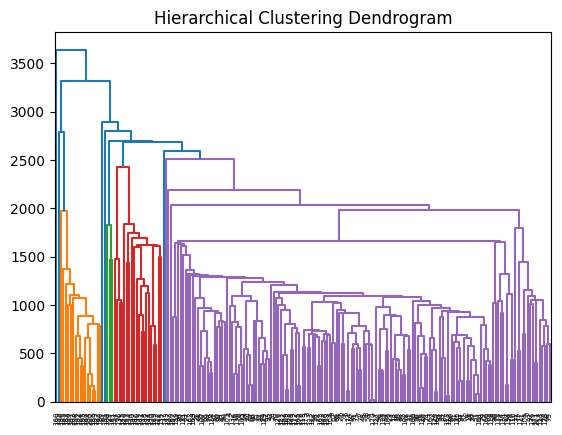

In [53]:
numerical_columns = df.select_dtypes(include='number')

# Create a PCA object with the desired number of components
n_components = 2  # Specify the desired number of components
pca = PCA(n_components=n_components)

# Apply PCA on the numerical columns
principal_components = pca.fit_transform(numerical_columns)

# Create a new DataFrame with the reduced dimensions
principal_df = pd.DataFrame(data=principal_components, columns=['PC{}'.format(i+1) for i in range(n_components)])

# Print the principal components DataFrame
print(principal_df)

#HC_CLUSTERING

clustering = AgglomerativeClustering(n_clusters=5).fit(principal_df)

# print the class labels
print(clustering.labels_)

Z = linkage(principal_df,'single')

# Plot dendrogram
dendrogram(Z)

plt.title('Hierarchical Clustering Dendrogram')
plt.show()